# Investigación Operativa - I4051 
# Ing. Industrial - UTN BA
# Trabajo Practico 1
Hola! Te damos la bienvenida al trabajo práctico opcional en Python de Investigación Operativa I4051 Miércoles Noche. La idea de este trabajo es que puedas lograr ciertos objetivos como modelar un problema y poder traducirlo a un lenguaje de programación. Consideramos que concretar este trabajo no es solo avanzar en los requisitos de aprobación de la materia, también es un avance y progreso desarrollado para tu crecimiento profesional y personal.

Algunas consideraciones:
- El trabajo es individual. No podes hacerlo con otras personas. 
- Deberas dejar notas con el prefijo # en el codigo para que podamos entender que hiciste. El codigo tiene que estar comentado. Tenes que dejar en claro que acciones estas haciendo para que la persona que lo lee pueda entenderlo (un codigo ilegible y no explicado será penalizado).
- Podes agregar la cantidad de celdas que quieras para codigo. Debajo de las consignas podes escribir y hacer lo que quieras con el codigo, siempre que cumplas los objetivos que se te piden.
* Cuantas mas celdas crees el codigo estara mas "granulado" en compartimientos y por ende sera mas facil detectar posibles errores a diferencia de hacer todo el problema en una unica celda.
* Antes de comenzar a escribir el codigo podes empezar a diagramar el "pseudo codigo" y las partes que tendria tu codigo en papel. Una vez que tengas el diagrama macro de lo que tenes que hacer podes usarlo como "mapa/hoja de ruta" para saber como ir escribiendo el codigo.
- El codigo tiene que ser reproducible. Esto quiere decir que cuando los docentes lo evaluen tambien tienen que poder ejecutar el codigo.
- Es importante que cuando termines el trabajo guardes este notebook con todas las impresiones de pantalla y figuras que ejecuto el codigo. Esto genera que cuando el docente evalue pueda visualizar los resultados de manera directa. 

Te dejamos algunos links con acceso a documentación que creemos que te pueden servir:

### Librerias:
- Numpy https://numpy.org/ 

- Scipy https://www.scipy.org/
- Matplotlib https://matplotlib.org/
- Pandas https://pandas.pydata.org/
- Seaborn https://seaborn.pydata.org/ 

### Cheatsheets (resumenes con atajos)
- Numpy Cheatsheet (resumen con atajos de numpy) https://www.hb.ucsc.edu/wp-content/uploads/2017/09/numpy.pdf
- Pandas Cheatsheet (resumen con atajos de pandas) https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf 

### Ejemplos de visualización
- Ejemplos para visualizar con Python https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html


---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------

# Consigna del trabajo
**Objetivo 1** \
Dado un sistema de filas de espera con tasa de arribo lambda y despacho mu, ambas con distribuciones de probabilidad exponencial, generar una función “def” llamada “prueba_capacidad” donde ingrese como input:

* Cantidad de canales M
* Tasa de arribos lambda 
* Tasa de despacho mu
* Capacidad del sistema de contener clientes en la fila

La función debera calcular la longitud promedio de la fila dado los datos de input y la comparara si es mayor o menor que una capacidad teorica de la fila. Finalmente deberá devolver como output un cartel que diga:

* “El sistema de filas de X cantidad de canales tiene una cantidad media de personas esperando igual a X personas y es menor a la capacidad de la fila por N lugares” si es que la cantidad de personas promedio en fila es menor a la capacidad de la fila
* y otro cartel que diga “El sistema de filas tiene una cantidad promedio de clientes X en la fila y es mayor a la capacidad de la fila por N personas” en caso contrario.
\
\
Probar la funcion para la cantidad de canales M = 1,2,3,4 y 5. Los datos son lambda = 35 arribos por hora, mu de un canal = 40 despachos por hora. La capacidad de la fila es 20 personas. Imprimir en pantalla todas las respuestas.
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


In [5]:
# Importamos la libreria Numpy, es la que mas vas a usar.
import numpy as np
import string
import math

# Aclaracion:
Para realizar la siguiente operacion:
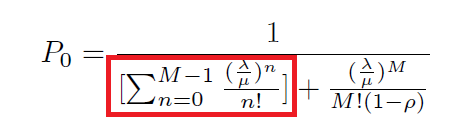

Se utilizo un ciclo for donde en cada iteracion se calculo la cuenta dentro de la serie, y a medida que avanzaba de iteracion a iteracion esto se suma y se computaba en la variable "sumatoria", para facilitar el calculo de P0


In [6]:
# Defino la funcion con la que vamos a contrastar la longitud promedio con la capacidad teorica
def prueba_capacidad(M, lamda, mu, capacidad):
    # Chequeo que los valores ingresados hayan sido correctos, si esto no se cumple se imprime un mensaje de error y se termina la funcion
    if M <= 0:
        print("Error: Debe haber al menos un canal de servicio")
        return 2
    if lamda <= 0:
        print("Error: La tasa de arribos no puede ser negativa o igual a 0")
        return 3
    if mu <= 0:
        print("Error: La tasa de despachos debe ser mayor a 0")
        return 4
    if capacidad <= 0:
        print("Error: La capacidad de la fila debe ser mayor a 0")
        return 5
    
    # Diferencio los casos cuando M = 1 y M > 1
    if M == 1:
        # Calculos
        ro = lamda/mu
        P0 = 1 - ro
        Lq = (lamda**2)/(mu*(mu-lamda))
        
        # Comparo la capacidad teorica con la cantidad media de personas en la fila
        if Lq < capacidad:
            dif = capacidad - Lq
            print("El sistema de filas de {} canales tiene una cantidad media de personas esperando igual a {} personas y es menor a la capacidad de la fila por {} lugares".format(M, Lq, dif))
        else:
            dif = Lq - capacidad
            print("El sistema de filas de {} canales tiene una cantidad media de personas esperando s {} en la fila y es mayor a la capacidad de la fila por {} personas".format(M, Lq, dif))
    
    # Para cuando M > 1
    else:
        # Obtengo el factor de trafico ro
        ro = lamda / (M * mu)        
        
        # Defino esta variable para poder calcular la serie en el divisor de P0
        sumatoria = 0
        for i in range(M):
            sumatoria = sumatoria + ((lamda / mu) ** i) / math.factorial(i)

        # Calculo P0
        P0 = 1 / (sumatoria + ((lamda / mu) ** M) / (math.factorial(M) * (1 - ro)))

        # Calculo la longitud media de la fila
        Lq = (P0 * ((lamda / mu) ** M) * ro) / (math.factorial(M) * (1 - ro) ** 2)

        # Comparo la capacidad con la cantidad media de personas en la fila
        if Lq < capacidad:
            dif = capacidad - Lq
            print("El sistema de filas de {} canales tiene una cantidad media de personas esperando igual a {} personas y es menor a la capacidad de la fila por {} lugares".format(M, Lq, dif))
        else :
            dif = Lq - capacidad
            print("El sistema de filas tiene una cantidad promedio de clientes {} en la fila y es mayor a la capacidad de la fila por {} personas".format(Lq, dif))


In [7]:
# M = 1, lamda = 35, mu = 40, capacidad = 20
prueba_capacidad(1,35,40,20)

El sistema de filas de 1 canales tiene una cantidad media de personas esperando igual a 6.125 personas y es menor a la capacidad de la fila por 13.875 lugares


In [8]:
# M = 2, lamda = 35, mu = 40, capacidad = 20
prueba_capacidad(2,35,40,20)


El sistema de filas de 2 canales tiene una cantidad media de personas esperando igual a 0.20712560386473433 personas y es menor a la capacidad de la fila por 19.792874396135264 lugares


In [9]:
# M = 3, lamda = 35, mu = 40, capacidad = 20
prueba_capacidad(3,35,40,20)

El sistema de filas de 3 canales tiene una cantidad media de personas esperando igual a 0.026871250783418395 personas y es menor a la capacidad de la fila por 19.97312874921658 lugares


In [10]:
# M = 4, lamda = 35, mu = 40, capacidad = 20
prueba_capacidad(4,35,40,20)

El sistema de filas de 4 canales tiene una cantidad media de personas esperando igual a 0.003646244630537597 personas y es menor a la capacidad de la fila por 19.996353755369462 lugares


In [11]:
# M = 5, lamda = 35, mu = 40, capacidad = 20
prueba_capacidad(5,35,40,20)

El sistema de filas de 5 canales tiene una cantidad media de personas esperando igual a 0.0004580849452219975 personas y es menor a la capacidad de la fila por 19.999541915054778 lugares
